# Importar las librerías necesarias
Salvo funciones muy sencillas, la mayoría de las funciones de Python están contenidas en librerías, las cuales requieren ser importadas. Para ello podemos usar el comando `import`. La palabra clave `as` nos permite darle un nombre distinto a la librería que importamos. También, usando `from` podemos importar las funciones que queremos de una librería dada.

En este caso importamos `eigvals`, para calcular los autovalores de una matriz, y también las librerías `numpy` (para cálculo numérico, contiene varias funciones matemáticas).

In [17]:
import numpy as np
import math
import scipy.special
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh, eigh

# La base del oscilador armónico

El oscilador armónico en su forma adimensional está definido por el Hamiltoniano:
$$\hat{H} = \hat{p}^2 + \hat{x}^2$$

## Autofunciones
Las autofunciones de $\hat{H}$ son:
$$\phi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}} e^{-x^2/2} H_n(x),$$ 
donde $H_n(x)$ es el $n$-ésimo polinomio de Hermite. Estas autofunciones son ortonormales, es decir, $\left < \phi_m \right | \left . \phi_n \right > = \delta_{mn}$, y forman una base completa.

## Elementos de matriz
Los elementos de matriz de los operadores posición y momento están dados por las siguientes fórmulas:
$$\left < m|\hat{x}|n \right > = \sqrt{\frac{n}{2}} \delta_{m, n-1} + \sqrt{\frac{n+1}{2}} \delta_{m, n+1},$$
$$\left < m|\hat{p}|n \right > = -i \sqrt{\frac{n}{2}} \delta_{m, n-1} + i \sqrt{\frac{n+1}{2}} \delta_{m, n+1}.$$

Consecuentemente, definimos las siguientes funciones en Python para obtenerlos:

In [18]:
def x_elem(m,n):
    if m == n - 1:
        return np.sqrt(n/2.)
    elif m == n + 1:
        return np.sqrt((n+1)/2.)
    else:
        return 0

def p_elem(m,n):
    if m == n - 1:
        return -1j*np.sqrt(n/2.)
    elif m == n + 1:
        return 1j*np.sqrt((n+1)/2.)
    else:
        return 0

A continuación definimos funciones para crear la representación matricial de los operadores. Esto es, no solo obtener un elemento de matriz, sino todos los elementos en una base de `N` autofunciones del oscilador armónico. Nótese que a la hora de definir el operador momento, a `numpy` es necesario aclararle que vamos a usar números complejos con el comando `dtype = complex`

In [19]:
# Matrix representation of the position operator
def X(N):
    mat = np.zeros([N, N])
    for m in range(N):
        for n in range(N):
            mat[m, n] = x_elem(m, n)

    return mat

# Matrix representation of the momentum operator
def P(N):
    mat = np.zeros([N, N], dtype=complex)
    for m in range(N):
        for n in range(N):
            mat[m, n] = p_elem(m, n)

    return mat

¿Tiene sentido lo que estamos haciendo? Reconstruyamos la representación matricial del Hamiltoniano original:
$$\hat{H} = \hat{p}^2 + \hat{x}^2$$
y mostrémosla en pantalla. Para calcular el producto de dos matrices, `numpy` nos provee de la función `matmul`.

In [20]:
matP2 = np.matmul(P(8),P(8))
matX2 = np.matmul(X(8),X(8))

print(matP2 + matX2)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  5.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  7.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  9.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j 11.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j 13.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  7.+0.j]]


Se puede ver que todos los elementos no diagonales son $0$, y los diagonales son $1, 3, 5, 7 \ldots$, es decir, $2n + 1$. Pero hay dos problemas. Por un lado, estamos usando números complejos para representar a $\hat{H}$, lo cual es innecesario. Por el otro, el último elemento está claramente mal. 

¿Por qué estamos usando números complejos? Porque los elementos de matriz del operador $\hat{p}$ está compuesta por números imaginarios. Sin embargo, nosotros estamos interesados en $\hat{p}^2$, que es real. 
Lo más fácil será definir una nueva función para representar al operador $\hat{p}^2$:

In [21]:
def P2(N):
    Pmat = P(N)
    #ans_complex = P(N).dot(P(N))
    ans_complex = np.matmul(Pmat,Pmat)

    return np.array(ans_complex, dtype=float)

Aquí, el comando `dtype=float` le dice a `numpy` que queremos obtener una matriz real. Si ahora le pedimos la representación del operador $\hat{p}^2$, veremos que nos tira una advertencia, pero como sabemos lo que estamos haciendo la podemos ignorar (Python tiene maneras de atrapar advertencias y hacer algo con ellas, pero escapa al contenido de este TP).

In [22]:
P2(10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([[ 0.5       ,  0.        , -0.70710678,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.5       ,  0.        , -1.22474487,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.70710678,  0.        ,  2.5       ,  0.        , -1.73205081,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.22474487,  0.        ,  3.5       ,  0.        ,
        -2.23606798,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.73205081,  0.        ,  4.5       ,
         0.        , -2.73861279,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -2.23606798,  0.        ,
         5.5       ,  0.        , -3.24037035,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -2.73861279,
         0.        ,  6.5       ,  0.        

Volviendo ahora a la matriz que representa al Hamiltoniano:

In [23]:
matP2 = P2(8)
matX2 = np.matmul(X(8),X(8))

print(matP2 + matX2)

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  9.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 11.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 13.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.]]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


¿Por qué el último valor está mal?
Cuando usamos la resolución de la identidad $I = \sum_m \left | m \right > \left < m \right |$ para representar un producto de operadores usando un producto de matrices, necesitamos una base completa. En nuestro caso, la base no es completa, porque la estamos truncando en los `N` elementos. ¿Qué pasa si usamos 9 elementos en vez de 8 para representar el mismo operador?

In [24]:
N = 9
matP2 = P2(N)
matX2 = np.matmul(X(N),X(N))

print(matP2 + matX2)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  9.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 11.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 13.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 15.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  8.]]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


Vemos que el último elemento sigue estando mal, pero el anteúltimo ahora está bien. Para estar seguros, a partir de ahora vamos a descartar los elementos de matriz correspondientes a los últimos elementos de base. Por ejemplo:

In [25]:
matH_wrong = P2(14) + np.matmul(X(14),X(14))

matH = matH_wrong[:10, :10]
print(matH)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 11.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 13.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 15.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 17.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 19.]]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


A continuación vamos a usar las funciones que escribimos para obtener los autovalores del oscilador cuártico, definido por el siguiente Hamiltoniano:
$$H = \hat{p}^2 + \hat{x}^4$$
Este problema no tiene solución analítica, por lo tanto la única opción que tenemos es resolverlo numéricamente.

In [26]:
def H4(N):
    # Use extra elements to properly represent X^4
    matP2 = P2(N+4)
    matX = X(N+4)

    ans = matP2 + np.matmul(np.matmul(np.matmul(matX,matX),matX),matX)

    return ans[:N, :N]

Por suerte `numpy` ya tiene incorporada la posibilidad de calcular los autovalores de una matriz, con la función `eigvals`. La usaremos para obtener los autovalores de $\hat{H}$ en una base conformada por las primeras 10 autofunciones del oscilador armónico:

In [27]:
vals = sorted(eigvalsh(H4(10)))

for n, val in enumerate(vals):
    print('{:3d}{:15.8f}'.format(n, val))

  0     1.06130604
  1     3.80697493
  2     7.47161843
  3    11.76547692
  4    18.82038448
  5    27.54235331
  6    52.90835906
  7    73.44115907
  8   155.98833199
  9   199.69403577


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


¿Qué tan buenos son estos autovalores? Una manera de estimarlo es repitiendo el cálculo en una base más grande.

In [28]:
vals = sorted(eigvalsh(H4(20)))

for n, val in enumerate(vals[:10]):
    print('{:3d}{:15.8f}'.format(n, val))

  0     1.06036553
  1     3.79969850
  2     7.45579319
  3    11.64622150
  4    16.27613659
  5    21.25553445
  6    26.73757831
  7    33.04974028
  8    43.77053550
  9    55.12388129


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


Vemos que a medida que aumenta el número cuántico, el autovalor obtenido varía mucho mas conforme aumentamos el número de elementos de base empleados.
Una buena manera de conocer la calidad de nuestro resultado es ir repitiendo el cálculo con números crecientes de elementos de base. Por ejemplo, para el estado fundamental, tenemos:

In [29]:
for N in range(1, 51):
    vals = eigvalsh(H4(N))
    val = min(vals)
    print('{:2d}{:18.12f}'.format(N, val))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


 1    1.250000000000
 2    1.250000000000
 3    1.071091654200
 4    1.071091654200
 5    1.070767076554
 6    1.070767076554
 7    1.065027659535
 8    1.065027659535
 9    1.061306042170
10    1.061306042170
11    1.060452950654
12    1.060452950654
13    1.060389818082
14    1.060389818082
15    1.060387843121
16    1.060387843121
17    1.060374464624
18    1.060374464624
19    1.060365527703
20    1.060365527703
21    1.060362638190
22    1.060362638190
23    1.060362169240
24    1.060362169240
25    1.060362156663
26    1.060362156663
27    1.060362141848
28    1.060362141848
29    1.060362114597
30    1.060362114597
31    1.060362097872
32    1.060362097872
33    1.060362091928
34    1.060362091928
35    1.060362090706
36    1.060362090706
37    1.060362090625
38    1.060362090625
39    1.060362090614
40    1.060362090614
41    1.060362090561
42    1.060362090561
43    1.060362090516
44    1.060362090516
45    1.060362090493
46    1.060362090493
47    1.060362090486
48    1.06036

Vemos que con 50 elementos de base el estado fundamental ya coincide en 13 cifras con el resultado de 49 cifras. Compare con el dato de literatura: $1.06036209048418289964704601$

## Preguntas:
* ¿Qué significado tiene el autovalor obtenido usando un solo elemento de base?
* ¿Por qué al agregar un solo elemento de base cuando el número de elementos es par el resultado no cambia?
* ¿Podríamos hacer el mismo cálculo con 100, 200, o 1000 elementos de base y obtener el número de cifras correctas que queramos? Haga la prueba.

## Las autofunciones

Ya sabemos cómo calcular los autovalores del Hamiltoniano del oscilador cuártico, ahora vamos a calcular las autofunciones. `numpy` nos permite obtener los autovectores de una matriz con el comando `eig` (o `eigh`, si la matriz que vamos a diagonalizar es hermítica).

En nuestro caso, ya hemos determinado que para el estado fundamental del oscilador cuártico, 50 elementos de base son suficientes para obtener el autovalor con la precisión que queremos.
Entonces, calculamos los autovalores y autovectores con 50 elementos de base:

In [30]:
N = 50
vals, vecs = eigh(H4(N))
# Sort the eigenvalues and eigenvectors
vals_sorted = np.sort(vals)
vecs_sorted = vecs[:, vals.argsort()]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


En este caso vamos a prestarle atención, por ejemplo, al estado con $v = 2$.

In [40]:
v = 2
val = vals_sorted[v]
vec = vecs_sorted[:, v]

Sabemos que la función de onda puede ser escrita como:
$$\psi_v(x) = \sum_{n,v}^N c_{nv} \phi_{n}(x).$$
Aquí las columnas matriz ${\bf c}$ son los autovectores de $\hat{H}$ en la base del oscilador armónico.
Para evaluar los $\phi_n(x)$ usamos la función que habíamos definido en el TP anterior:

In [32]:
def wfn(n, X):
    norm = 1/np.sqrt(2**n*math.factorial(n)*np.sqrt(np.pi))

    return  norm * np.exp(-X**2/2) * scipy.special.eval_hermite(n, X)


## Graficando la autofunción de $\hat{H}$

Para graficar $\psi_v(x)$, necesitamos evaluarla en varios puntos. Primero definimos el rango de ploteo, y usamos `linspace` para crear un vector con esos puntos:

In [33]:
n_points = 501
X = np.linspace(-5, 5, n_points)

A continuación definimos el vector que contendrá esos puntos y los evaluamos usando la ecuación presentada anteriormente:

In [34]:
Y4 = np.zeros(n_points)

for n in range(N):
    Y4 += vec[n]*wfn(n, X)

Finalmente, podemos graficar la autofunción:

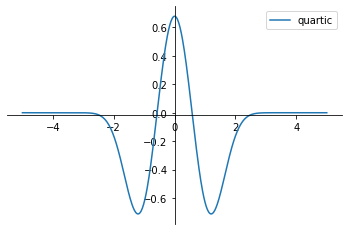

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(X, Y4, label = 'quartic')
plt.legend()
plt.show()

Se parece mucho a la tercera autofunción del oscilador armónico. Podemos graficarlas juntas para comparar:

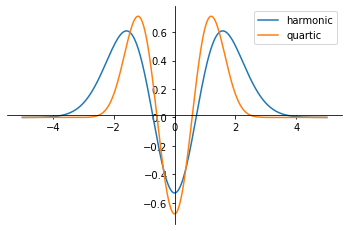

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(X, wfn(v, X), label = 'harmonic')
plt.plot(X, -Y4, label = 'quartic')
plt.legend()
plt.show()